<a class="anchor" id="nutshell"></a>
<h2 style="font-family:'Verdana',sans-serif; color:#1D7874;">L2RPN Neurips Track 1 in a nutshell</h2>
For more detailed explanation about the opponent, please reger to the notebook <i>9_EnvironmentModifications.ipynb</i> of the official grid2op getting started repository. It is avaible at <a href="https://github.com/rte-france/Grid2Op/tree/master/getting_started"> https://github.com/rte-france/Grid2Op/tree/master/getting_started </a> (if you download grid2op) and can be run interactively (without any install) in a browser thanks to mybinder at this link :
    <a href="https://mybinder.org/v2/gh/rte-france/Grid2Op/master"><img src="utils/img/badge_logo.svg"></a>
    
<h3 style="font-family:'Verdana',sans-serif; color:#1D7874;">Competition description</h3>
<p style="font-family:'Verdana','sans-serif'; color:#393D3F; text-align:justify; font-size:14px;">
In the L2RPN competition you ask to submit an agent that operates a powergrid. More specifically, your agent need to survive (avoid blackout) for the longest number of time steps possible.
<br>    
  You are asked to submit the code of your agent as it will be evaluated on the cloud. All participants are evaluated with the same input and the same environment having the same seed. The competition is split into three phase:
</p>

| Phase      |  Start     |  End       | Description      | Max submissions per day | Max submissions total |
|:-----------|:-----------|:-----------|:-----------------|:-------:|:--------:|
| warmup     | 08/07/2020 | 17/08/2020 |  The warmup phase is designed to let everyone experiment with the proposed problem, create and submit early agents. During warmup, participants may find bugs, unexpected behaviors and other errors in the track setup. In that case, the organizers are commited to assess, correct and update the competition software and datasets based on the community feedback.   | 20 | 1000
| validation | 18/08/2020 | 27/10/2020 |  The validation phase is the main competition phase. Participants are allowed to submit their code up to 20 times a day within the limit of 1,000 total submissions during the phase.  | 20 | 1000 |
| test       | 28/10/2020 | 29/10/2020 |  In the final phase, the **last** solution from the validation phase of each participant is tested on a new dataset and ranked by score. Winners will be announced after all submissions have been tested and verified. | 1 | 1 |

<p style="font-family:'Verdana','sans-serif'; color:#393D3F; text-align:justify; font-size:14px;">
In this first track, your agent will be evaluated in a presence of an *Opponent* that can take malicious (adversarial) attack to disturb you from achieving your goal.
</p>

<a class="anchor" id="why_opp"></a>
<h3 style="font-family:'Verdana',sans-serif; color:#1D7874;">A. Why an opponent</h3>

<p style="font-family:'Verdana','sans-serif'; color:#393D3F; text-align:justify; font-size:14px;">
    Actually, in the powersystem litterature, lots of robustness criterion are used. In most of this litterature (and for real time operation in most TSOs!) the "N-1" security criterion is often used. One of the consequences of this criterion is that: </p>
    <ul style="font-family:'Verdana','sans-serif'; color:#393D3F; text-align:justify; font-size:14px;">
        <li> at each time step, the flow on each powerline should be lower that the "thermal limit" [in case of grid2op this translates to np.all(obs.rho \leq 1)] </li>
        <li> even if one element in the grid would fail, the above condition should be met </li>
    </ul>
<p style="font-family:'Verdana','sans-serif'; color:#393D3F; text-align:justify; font-size:14px;">
    This means that, not only an agent should be robust in the current state, but also in a fictive state were one of the powerline is disconnected.
    <br><br>
    This criterion has many motivations.
    <br>
    Powergrids cover large areas, usually they are the side of a whole country / state for example, counting hundred of thousands of "equipment" (varying in size from the tiny screws to fix two things together to wide transformers of the size of a building...) split all accross hundreds of square kilometers (or miles). The probability, in these conditions, that any of this equipment fails is far from neglectable (if an object has a probability of failure of <i>p</i>, then the probability that at least one object among <i>N</i> fails [under some assumption] can be approximate with <i>(1 - (1 - p)^N)</i> which goes really fast to 1 when <i>N</i> is 10000 for example even if <i> p </i> is really small).
    <br>
    The gigantic size of powergrid also means that it is likely that there is something going wrong somewhere.The "failure" of an equipment have dozens of possible causes: it is in a bad shape (not enough maintenance), it suffers from an natural external aggression (wind storm, struck by lightning bolts, a tree falls on it, the external temperature is too hot causing some thermal issues etc.). Once again, the larger the grid, the higher the odds that these conditions arise.
    <br>
    A powergrid can also be the "victim" of malicious attacks (a person hack a piece of software or physically attack the equipement with a bulldozer or a bombing for example) or it is not operated inside its standard operation range (human error, bad data are send to the control center etc.).
    <br><br>
    Most of these phenomenon have a common consequence: one or more powerlines will be disconnected from the grid, and this is why the criterion exposed at the beginning of the paragraph is often chosen as security criterion.
    <br>
    Unfortunately, this criterion imply a large computation burden. In the grid proposed for this competition, you have 59 powerlines. This would mean that at each time, to make sure your agent is "safe" using standard power system criteria would require 60 times the computation as today (we would need to compute not one state of the grid but one when all powerlines are connected, and one for each disconnection of powerlines). This is not practical in practice.
    <br><br>
    This is why we decided to introduce an "opponent" in this track. This opponent have the power to force the disconnection of some powerlines, any powerline it wants actually. Concretly, it can act by looking at the observation (just like your agent) and choose to disconnect a powerline for a given number of time steps. During this time, it is not possible to reconnect the given powerline. The opponent has a limited budget, so that it cannot act over and over again (and to make the problem tractable).
    <br>
    On a thought experiment, if you imagine the opponent simulating all the possible outcome for all possible powerline disconnection and disconnect the worst one (for example the one given the worst grid state), having an agent that successfully manage all the scenario in this case will imply that your agent is robust given the power system "n-1" security criteria. 
    <br>
    The opponent track allows, while maintaining the computation tractable (provided that the opponent does not take too long to take its decision) to be as resilient as possible.
    <br><br> 
    When an attack occurs, the powerline will be automatically <i>disconnected</i>. It will stay <i>disconnected</i> until you reconnect it. This entails that if you don't reconnect them, they will remain disconnected until the end of time, leaving you more vulnerable for future attacks!
    <br> <br> 
    For this track you will be asked to study the powergrid shown below:
</p>

/home/benjamin/Documents/grid2op_dev/grid2op/MakeEnv/Make.py:255: UserWarning:

You are using a development environment. This environment is not intended for training agents. It might not be up to date and its primary use if for tests (hence the "test=True" you passed as argument). Use at your own risk.



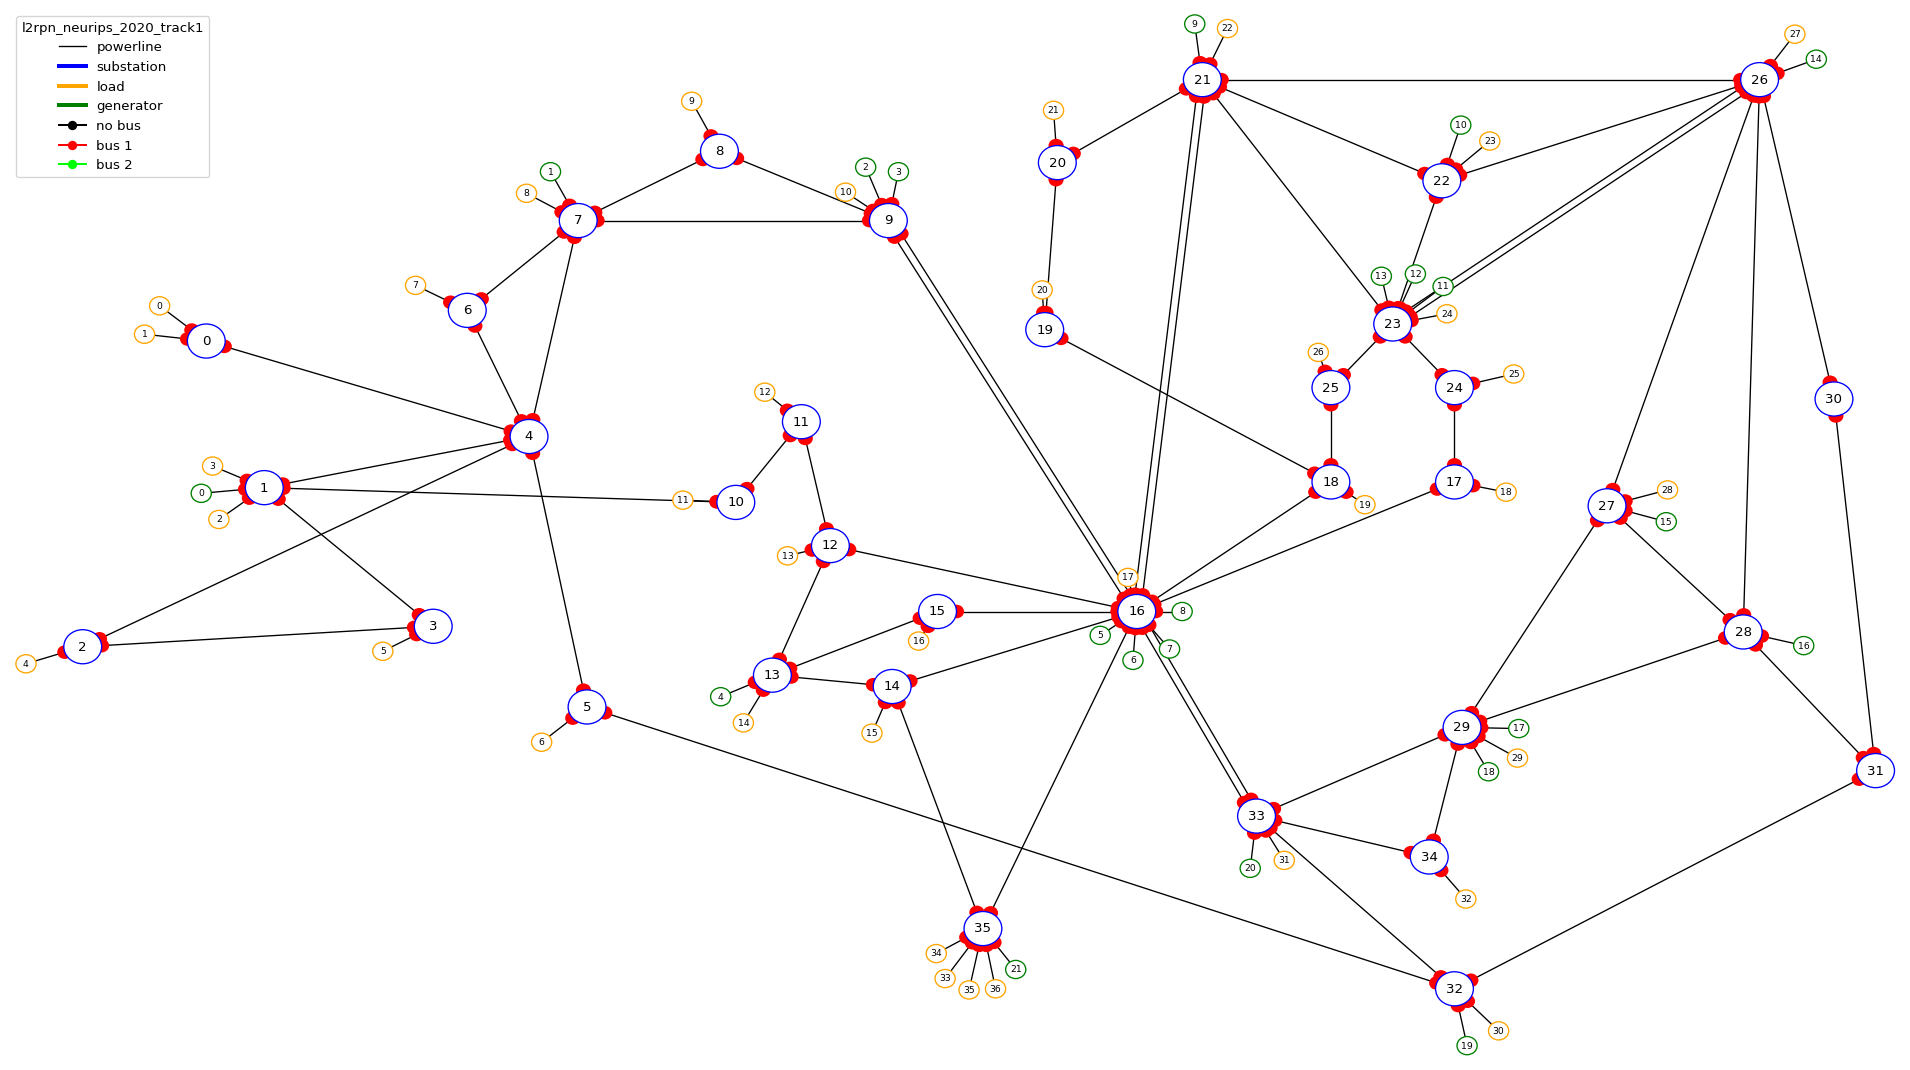

In [1]:
import numpy as np
import matplotlib
import grid2op
import re
assert grid2op.__version__ >= "1.1.0", "You need grid2op at least 1.1.0 to compete in this track."
from grid2op.PlotGrid import PlotMatplot
env_opp = grid2op.make("l2rpn_neurips_2020_track1", test=True, difficulty="0")
env_opp.seed(3)  # for reproducible experiments
obs = env_opp.reset()
plot_helper_opp = PlotMatplot(env_opp.observation_space, width=1920,height=1080, line_id=False)
_ = plot_helper_opp.plot_layout()

<p style="font-family:'Verdana','sans-serif'; color:#393D3F; text-align:justify; font-size:14px;">
    This powergrid is the same one that the one used for the wcci competitions, except that we modified the names to match their original denomination.
    <br>
    It is made of 36 substations, with 22 generators and 29 loads and 59 lines.
    <br>
    It has the particularity to be a "subgrid" of the larger 118 grid as shown here :
    <img src="utils/img/R2_full_grid.png">
    The main consequence is that, when we generated the data, some energy was transfered from this area into the other. This is why you will notice some objects that we modeled as "loads" but that are in fact interconnexion powerline. You can recognize them because they have "interco" in their names (see cell bellow). There are no major difference, for this competition between a regular loads or an interconnection powerline. The only difference is that sometimes interconnection powerlines can have negative values (regular loads always have positive value). We highlighed in thick dark green the interconnection powerline.
    <br><br>
    In the two cells bellow are printed first all the loads that represent interconnection powerlines (that can be either positive or negative) and then the normal loads (that can only be positive).
</p>

In [2]:
[el for el in env_opp.name_load if re.match(".*interco.*", el) is not None]

['interco_14_32',
 'interco_18_33',
 'interco_29_37',
 'interco_64_67',
 'interco_68_74',
 'interco_68_76',
 'interco_68_69',
 'interco_67_68']

In [3]:
[el for el in env_opp.name_load if re.match(".*load.*", el) is not None]

['load_32_26',
 'load_33_27',
 'load_34_28',
 'load_35_29',
 'load_38_30',
 'load_39_31',
 'load_40_32',
 'load_41_33',
 'load_42_34',
 'load_43_35',
 'load_44_36',
 'load_45_37',
 'load_46_38',
 'load_47_39',
 'load_48_40',
 'load_49_41',
 'load_50_42',
 'load_51_43',
 'load_52_44',
 'load_53_45',
 'load_54_46',
 'load_55_47',
 'load_56_48',
 'load_57_49',
 'load_58_50',
 'load_59_51',
 'load_61_52',
 'load_65_53',
 'load_66_54']

<a class="anchor" id="opp_model"></a>
<h3 style="font-family:'Verdana',sans-serif; color:#1D7874;">B. Grid2op Opponent modeling</h3>

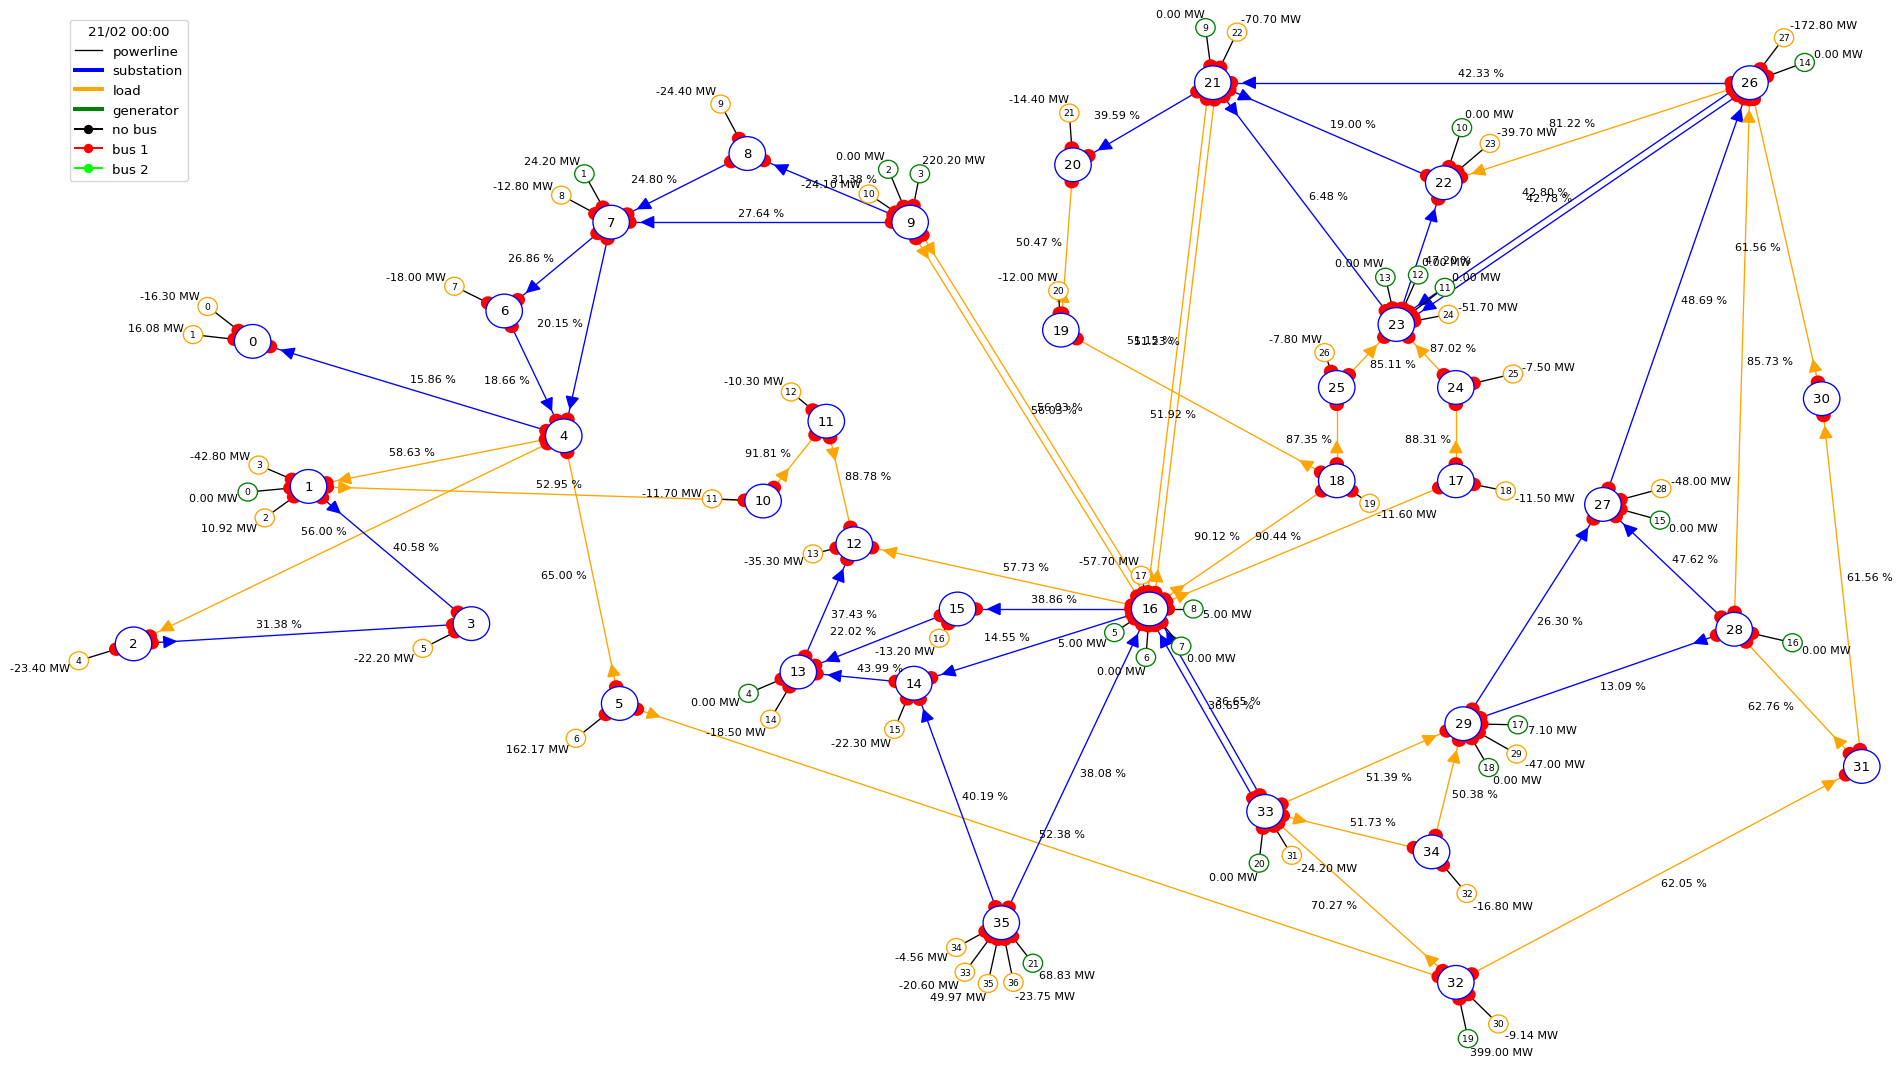

In [4]:
line_id_opp = 18
reconnect_action_opp = env_opp.action_space({"set_line_status": [(line_id_opp, +1)]})
do_nothing_opp = env_opp.action_space()
_ = plot_helper_opp.plot_obs(obs)

<p style="font-family:'Verdana','sans-serif'; color:#393D3F; text-align:justify; font-size:14px;">
    We know (but that is because we set the seed and because we coded this environment) that an attack will happen at time step 91 so we do_nothing until that time. And, to be transparent, we show the state of the powergrid.
</p>    

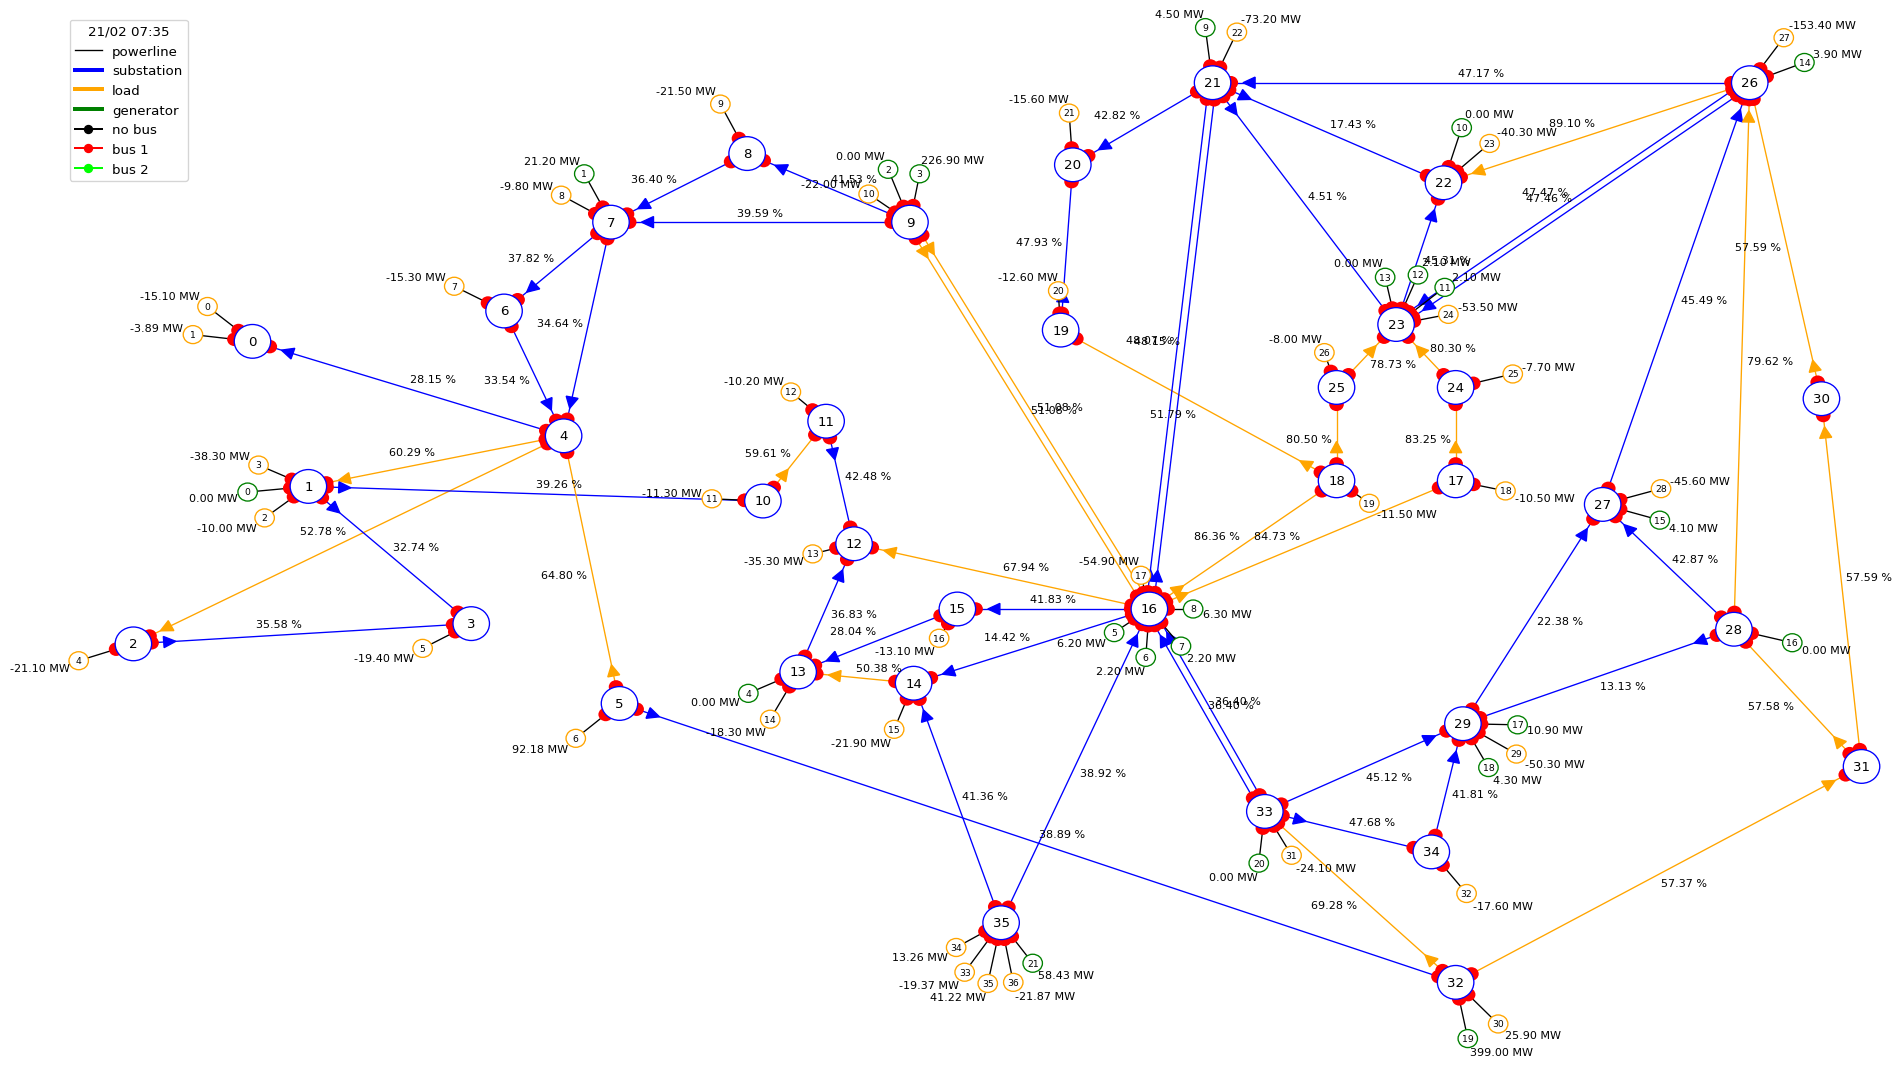

In [5]:
for i in range(91):
    obs, reward, done, info = env_opp.step(do_nothing_opp)
_ = plot_helper_opp.plot_obs(obs)

<p style="font-family:'Verdana','sans-serif'; color:#393D3F; text-align:justify; font-size:14px;">
    Now let's do another step, as you will see, a powerline will be disconnected (we know it because we made this environment, but there is no way for an agent to actually know this information)
    </p>   

The flow on this powerline is 0.0%
This powerline is unavailable for 47 time steps
I can also spot an attack by looking at the "info" dictionnary, that tells me that an attack is taking place on powerline: [18], and this attack will last 48 time steps (in total, it started this time step so it will be over in 47 = 48 - 1 time steps).


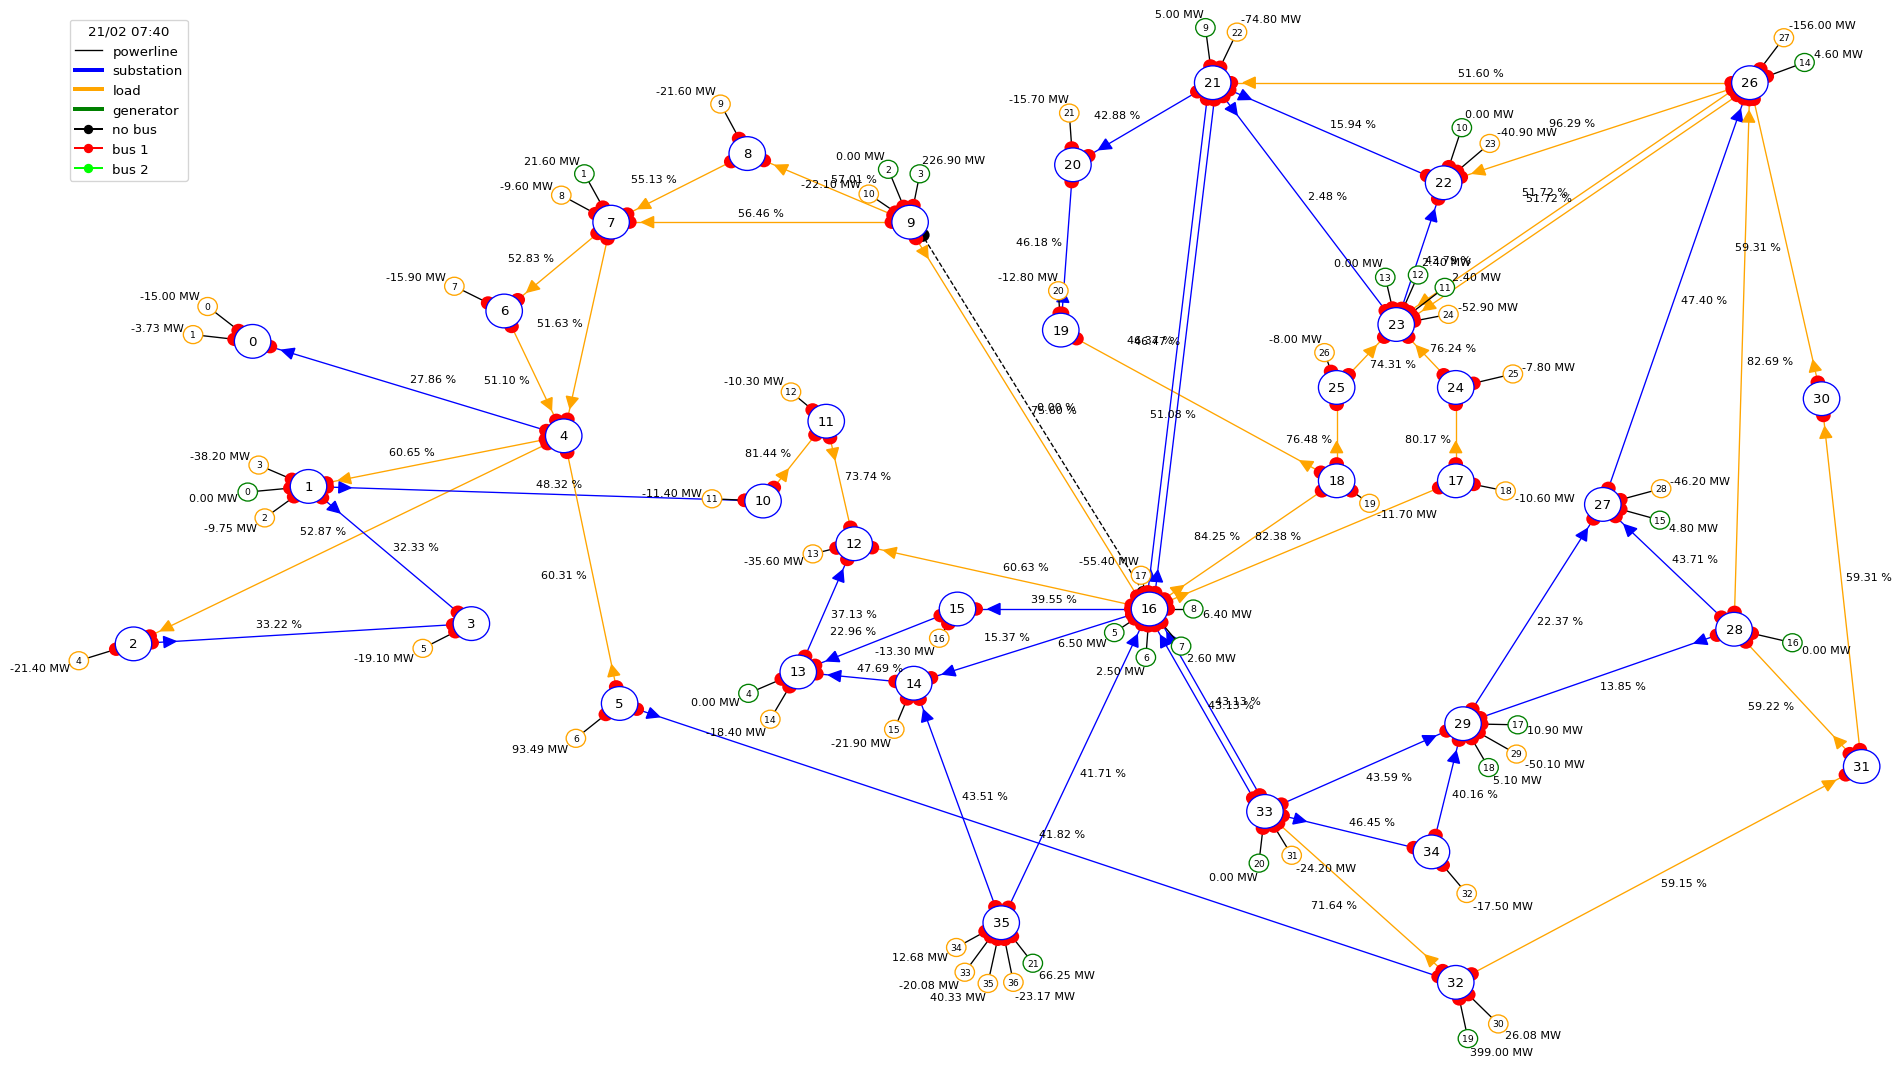

In [6]:
obs, reward, done, info = env_opp.step(do_nothing_opp)
_ = plot_helper_opp.plot_obs(obs)
print("The flow on this powerline is {:.1f}%"\
      "".format(100*obs.rho[line_id_opp]))
print("This powerline is unavailable for {} time steps".format(obs.time_before_cooldown_line[line_id_opp]))
print("I can also spot an attack by looking at the \"info\" dictionnary, that tells me that an attack is taking " \
      "place on powerline: {}, and this attack will last {} time steps (in total, it started this time step "\
      "so it will be over in 47 = 48 - 1 time steps)." \
      "".format(np.where(info["opponent_attack_line"])[0], info["opponent_attack_duration"]))

The powerline will be unavailble for again 46 time steps.


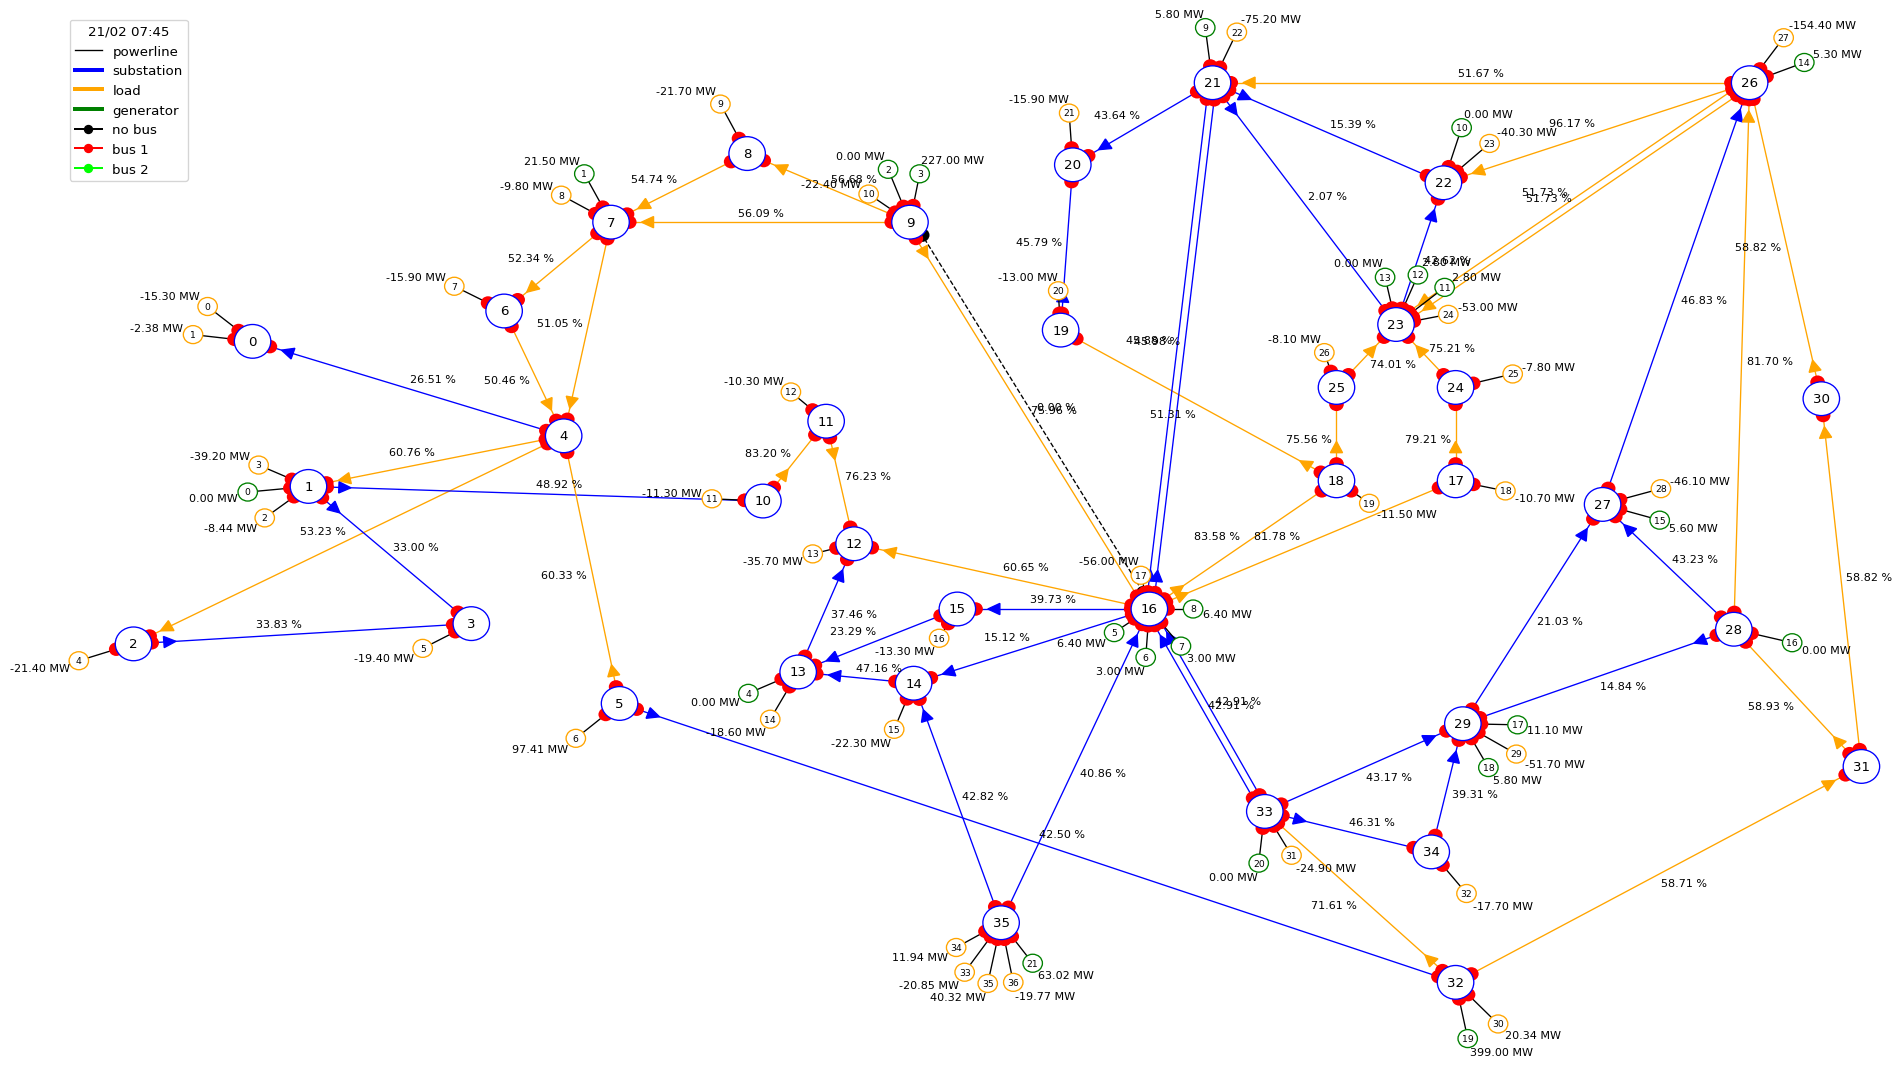

In [7]:
obs, reward, done, info = env_opp.step(do_nothing_opp)
_ = plot_helper_opp.plot_obs(obs)
print("The powerline will be unavailble for again {} time steps."\
      "".format(obs.time_before_cooldown_line[line_id_opp]))

<p style="font-family:'Verdana','sans-serif'; color:#393D3F; text-align:justify; font-size:14px;">
There is nothing really interesting in here, so we will do nothing for 46 time steps
</p>

The next maintenance is schedule in -1 time steps (-1 = never)
The powerline will be unavailble for again 0 time steps.


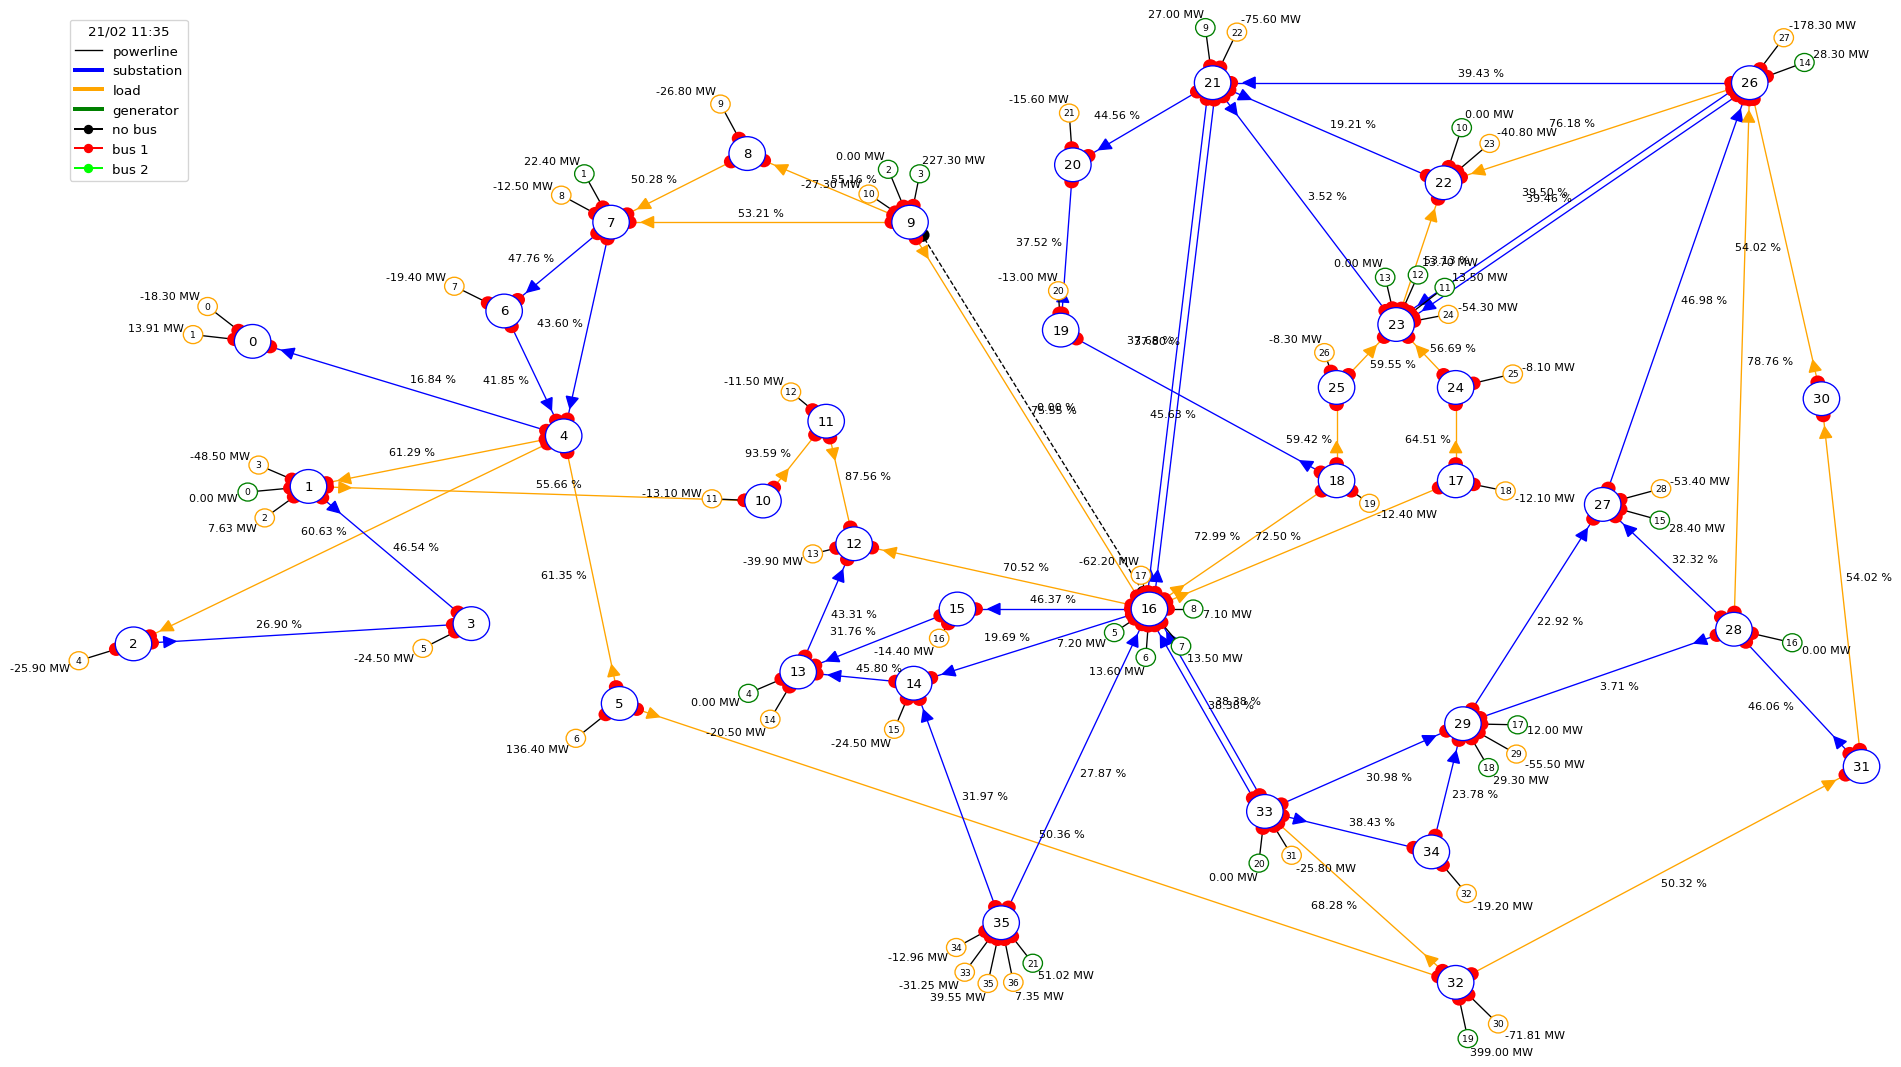

In [8]:
for i in range(46):
    obs, reward, done, info = env_opp.step(do_nothing_opp)
_ = plot_helper_opp.plot_obs(obs)
print("The next maintenance is schedule in {} time steps (-1 = never)"\
      "".format(obs.time_next_maintenance[line_id_opp]))
print("The powerline will be unavailble for again {} time steps."\
      "".format(obs.time_before_cooldown_line[line_id_opp]))

<p style="font-family:'Verdana','sans-serif'; color:#393D3F; text-align:justify; font-size:14px;">
We see here that the powerline can be reconnected (`obs.time_before_cooldown_line[line_id_opp] = 0`), but it has not been reconnected automatically (it is still disconnected). In the next cell we reconnect it, now that is possible.
</p>

Can i act on the powerline: True
In how many time I will be able to reconnect it: 0
Is the powerline connected: True
The flow on it is 251.6A


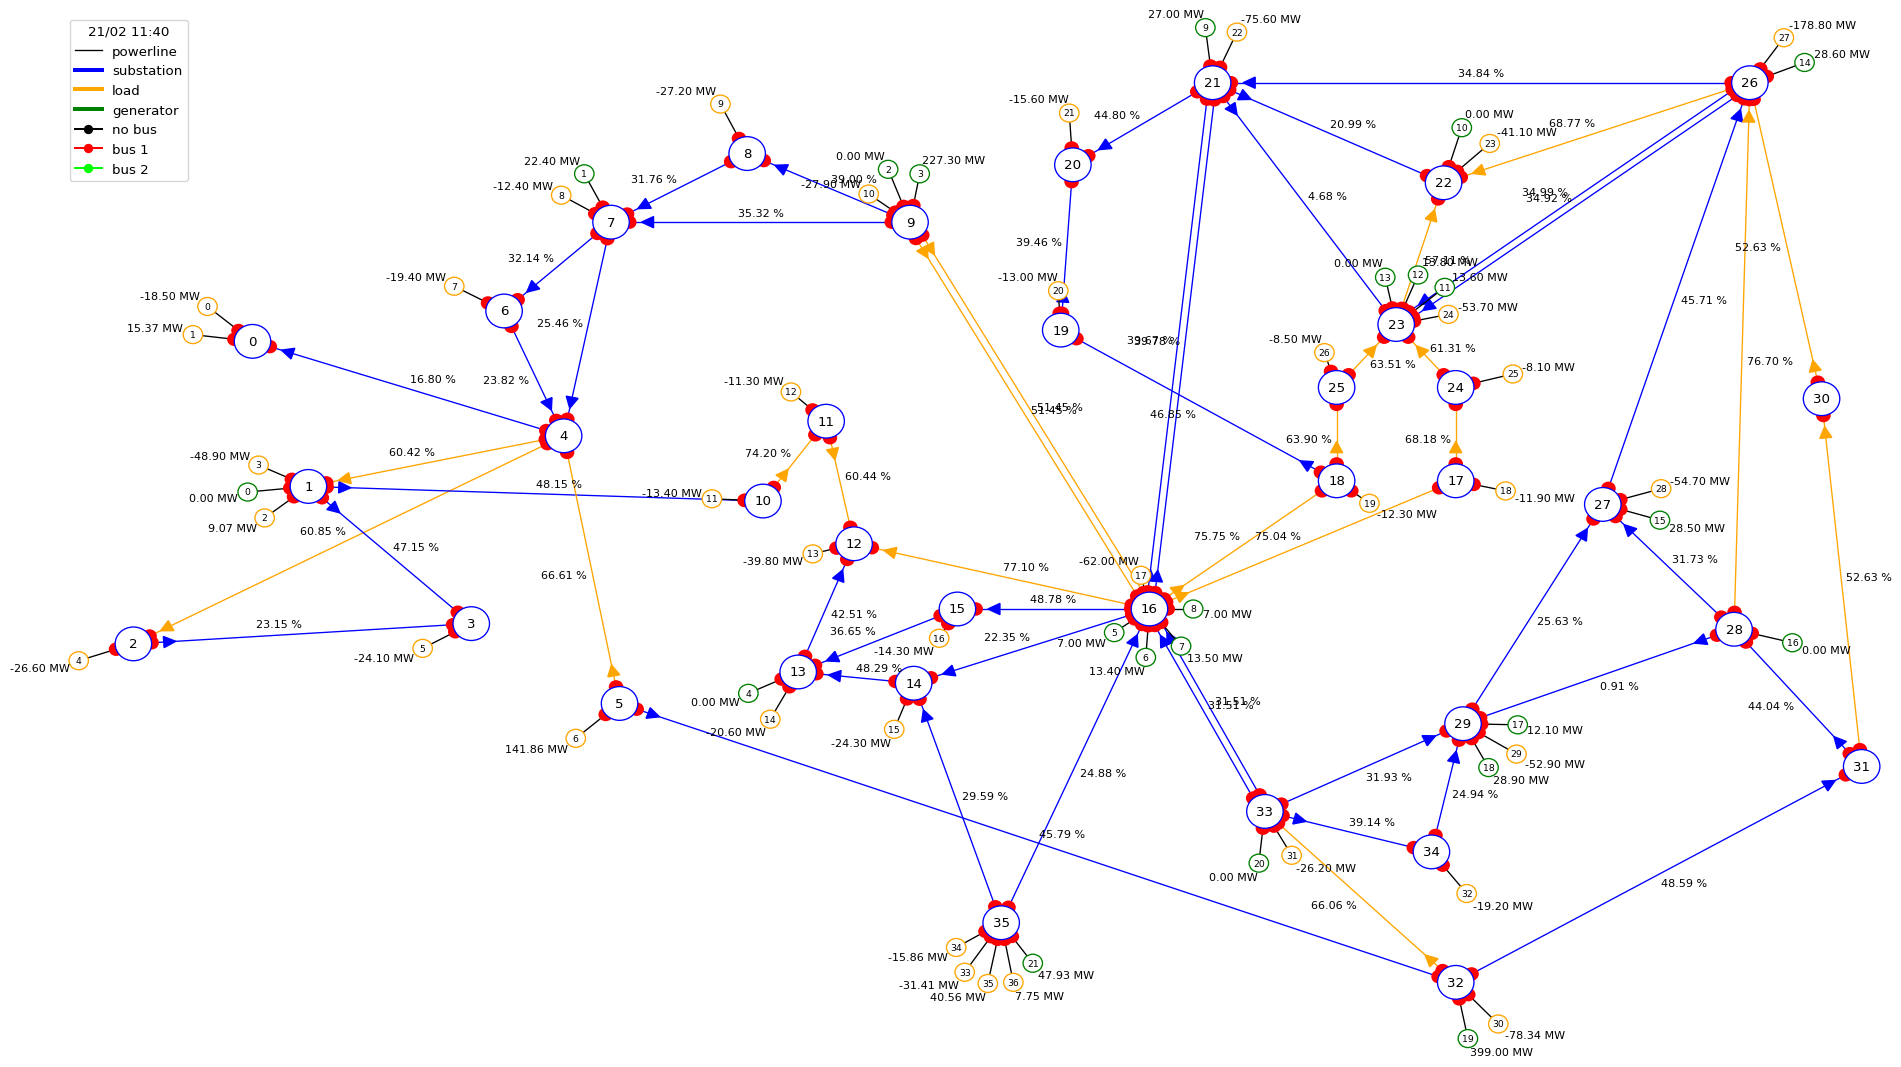

In [9]:
# and now reconnect it
obs, reward, done, info = env_opp.step(reconnect_action_opp)
print("Can i act on the powerline: {}".format(obs.time_before_cooldown_line[line_id_opp] == 0))
print("In how many time I will be able to reconnect it: {}".format(obs.time_before_cooldown_line[line_id_opp]))
print("Is the powerline connected: {}".format(obs.line_status[line_id_opp]))
print("The flow on it is {:.1f}A".format(obs.a_or[line_id_opp]))
_ = plot_helper_opp.plot_obs(obs)